# IFORM contour in n dimension

This tutorial illustrates the use of the ````DirectIform```` class to generate n dimensional contours. This handles projections and slices as well. 

References : 

- https://www.researchgate.net/profile/Ed-Mackay/publication/365459533_Model-free_environmental_contours_in_higher_dimensions/links/6376313954eb5f547cde7073/Model-free-environmental-contours-in-higher-dimensions.pdf?origin=publicationDetail&_rtd=eyJjb250ZW50SW50ZW50Ijoic2ltaWxhciJ9

- https://doi.org/10.1115/OMAE2019-95993

- https://github.com/edmackay/Direct-IFORM


In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from diform import DirectIform
import seaborn as sns

## Input data

In [2]:
from scipy.io import loadmat
a = loadmat( "../MATLAB/Example/Data_Celtic_Sea.mat", struct_as_record = False )
names = ["Hs" , "Tm" , "U10" , "dir_rel"]
df = pd.DataFrame( index = a["time"][:,0] , data = { k:a[k][:,0] for k in names  } )

In [3]:
# Variable change, so that data cloud is more convex
df.loc[: , "Hs**0.5"] = df.loc[: , "Hs"]**0.5
df["HL"] = df.Hs**0.5 * np.cos( df.dir_rel*np.pi/180 )
df["HT"] = df.Hs**0.5 * np.sin( df.dir_rel*np.pi/180 )

In [4]:
# Variable change dictionnary, this will be used to plot results in any desired space
transform_dict =  {  "Hs" : lambda df:df["Hs**0.5"]**2,
                     "Hs " : lambda df : (df["HL"]**2 +  df["HT"] **2), 
                     "Hs**0.5" : lambda df : (df["HL"]**2 +  df["HT"] **2)**0.5 ,
                     "Hs_L" : lambda df : (df["HL"]**2 + df["HT"]**2) * np.cos( np.arctan2(  df["HT"] ,  df["HL"] ) ) ,
                     "Hs_T" : lambda df : (df["HL"]**2 + df["HT"]**2) * np.sin( np.arctan2(  df["HT"] ,  df["HL"] ) ) ,
                     "THETA_REL" : lambda df : np.rad2deg(np.arctan2(  df["HT"] ,  df["HL"]  ))
                  }

In [5]:
rp_dict = { 1.0 : "darkblue" ,
            5.0 : "darkorange",
            50.0 : "green"}

## Fit on all projection directions

In [6]:
# The DirectIform object is created with input data, directions discretisation and parameter for the POT univariate fit.
diform_4d = DirectIform( df.loc[: , ["HL" , "HT", "Tm" , "U10"  ] ], npoints = 11, window_int= 48,
                         duration = len(df) / (24*365), threshold_q = 0.9, 
                         pot_kwargs = { "shape_bounds" : (None, -1e-12) } )
diform_4d.fit_projections()

Fitting projections: 100%|██████████| 2720/2720 [02:07<00:00, 21.36it/s]


The result of this is fit parameters and return value for all projection directions, stored in a dataframe :

In [7]:
diform_4d.results_df

,HL_a,HT_a,Tm_a,U10_a,THRESHOLD,SCALE,SHAPE,NNLF,KS-PVALUE
0,0.000000,0.000000,0.000000,1.000000,2.484610,0.566104,-0.133548,127.621206,0.789985
1,0.000000,0.000000,0.110432,0.993884,2.538575,0.588235,-0.118929,150.004428,0.780514
2,0.000000,0.000000,0.242536,0.970143,2.544301,0.654326,-0.135170,186.863515,0.904693
3,0.000000,0.000000,0.393919,0.919145,2.533442,0.675744,-0.125837,201.561811,0.391662
4,0.000000,0.000000,0.554700,0.832050,2.443981,0.709536,-0.137350,212.990414,0.893688
...,...,...,...,...,...,...,...,...,...
2715,-0.833333,-0.500000,-0.166667,-0.166667,2.772277,0.164217,-0.314927,-483.363865,0.650285
2716,-0.925820,-0.154303,-0.154303,-0.308607,2.682390,0.173560,-0.176502,-385.025225,0.600936
2717,-0.925820,-0.154303,-0.308607,-0.154303,2.455934,0.179506,-0.457161,-485.149125,0.304395
2718,-0.925820,-0.308607,-0.154303,-0.154303,2.720430,0.180475,-0.276261,-407.212829,0.941283


## Extract contours and plot projections

The 4D contour can be retrieved with ````extract_contour```` 

In [8]:
diform_4d.extract_contour( rp = 50. )

Evaluate RP at each projection: 100%|██████████| 2720/2720 [00:00<00:00, 5027.77it/s]


,HL,HT,Tm,U10
0,-1.872688,0.100582,12.278546,1.606373
1,1.716838,1.796380,9.699502,21.655155
2,-1.872688,0.107238,12.310395,1.606373
3,1.674048,1.890640,10.150494,21.030064
4,-1.781402,0.308278,12.678554,1.241233
...,...,...,...,...
9489,1.504452,1.562897,12.236790,1.854880
9490,1.387057,1.702144,12.903026,2.322590
9491,1.462987,1.562897,12.236790,1.634612
9492,1.442342,1.569894,12.270265,1.579778


For visualisation, we can project this contour in lower dimensions:

<Axes3DSubplot: xlabel='Hs', ylabel='U10', zlabel='Tm'>

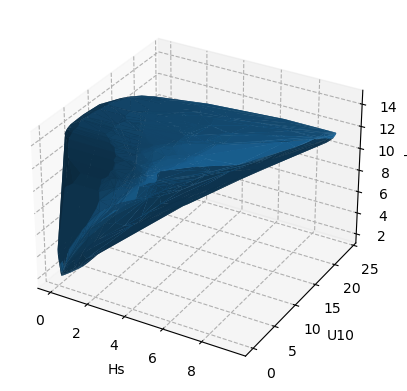

In [9]:
diform_4d.plot_projection_3d( variables = [ "Hs**0.5" , "U10" , "Tm"] , final_variables=["Hs", "U10", "Tm"] ,
                              rp = 50.0, transform_dict = transform_dict )

Evaluate RP at each projection: 100%|██████████| 2720/2720 [00:00<00:00, 4880.90it/s]


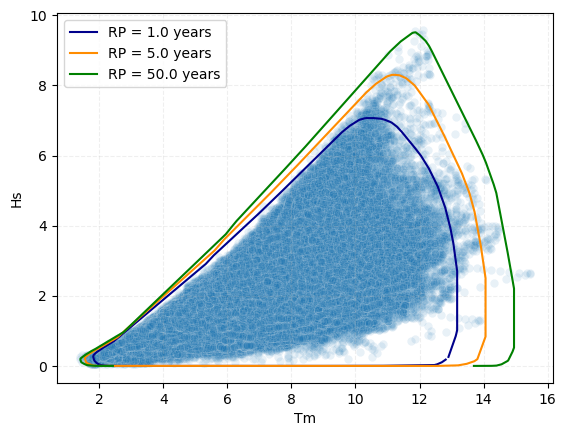

In [10]:
fig, ax = plt.subplots()
for rp, c in rp_dict.items() :
    diform_4d.plot_projection_2d( variables = ["Tm", "Hs**0.5"], final_variables = ["Tm", "Hs"] , rp = rp ,
                                  transform_dict=transform_dict, ax=ax, label = f"RP = {rp:} years", color = c)
sns.scatterplot(ax=ax, data = df, x = "Tm" , y = "Hs" , marker = "o", alpha = 0.1);
ax.legend();

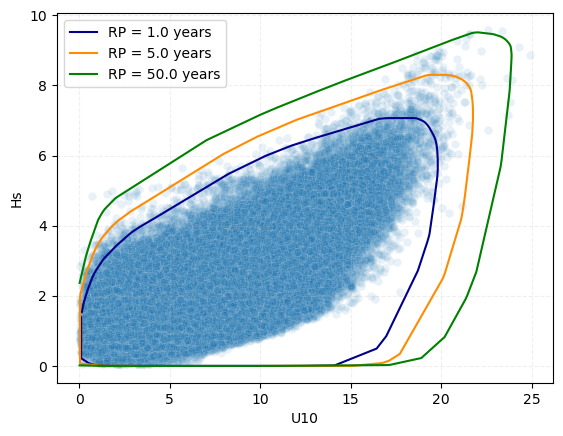

In [11]:
fig, ax = plt.subplots()
for rp, c in rp_dict.items() :
    diform_4d.plot_projection_2d( variables = ["U10", "Hs**0.5"], final_variables = ["U10", "Hs"] , rp = rp, ax=ax,
                                 transform_dict = transform_dict, label = f"RP = {rp:} years" , color = c) 
sns.scatterplot(ax=ax, data = df, x = "U10" , y = "Hs", marker = "o", alpha = 0.1 )
ax.legend();

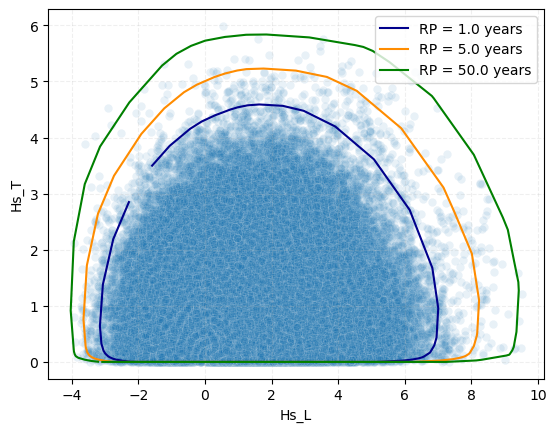

In [12]:
fig, ax = plt.subplots()
for rp, c in rp_dict.items() :
    diform_4d.plot_projection_2d( variables = ["HL", "HT"], final_variables = ["Hs_L", "Hs_T"] , rp = rp, ax=ax,
                                 transform_dict = transform_dict, label = f"RP = {rp:} years" , color =c) 
diform_4d.plot_data_2d( variables = ["Hs_L", "Hs_T"], transform_dict = transform_dict, ax=ax, alpha = 0.1)
ax.legend(loc = "upper right");

Slices can also be retrieved : 

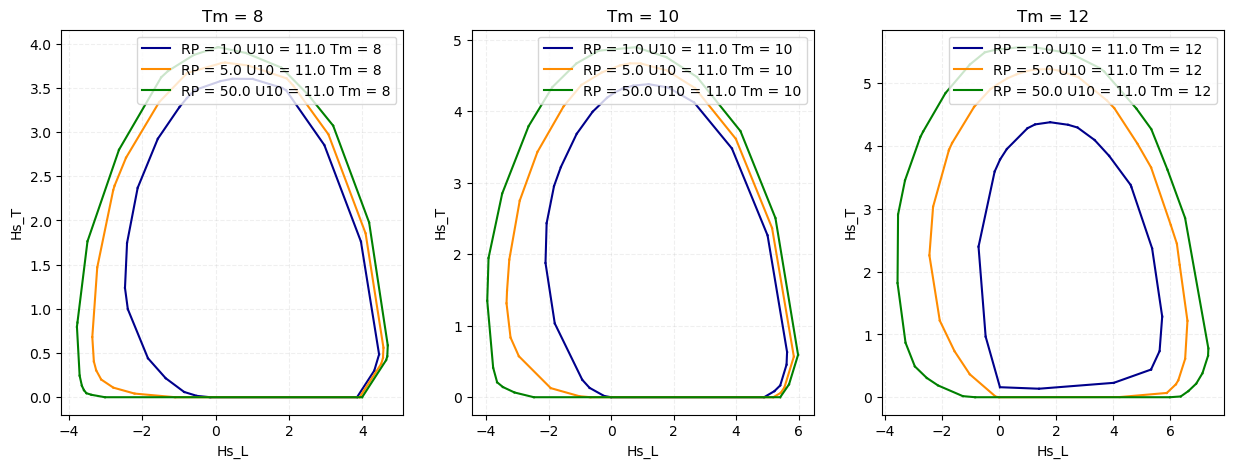

In [13]:
U10_cut = 11.0
fig, ax = plt.subplots(ncols=3, figsize=(15,5))
for i, tm in enumerate([8, 10, 12]):
    for rp, c in rp_dict.items() :
        diform_4d.plot_slice_2d( slice_dims=["U10", "Tm"], slice_values=[U10_cut, tm], final_variables = ["Hs_L", "Hs_T"],   rp = rp, color = c, ax=ax[i], transform_dict = transform_dict)
    ax[i].legend(loc = "upper right");
    ax[i].set(title = f"Tm = {tm:}")

## Diagnostic plots

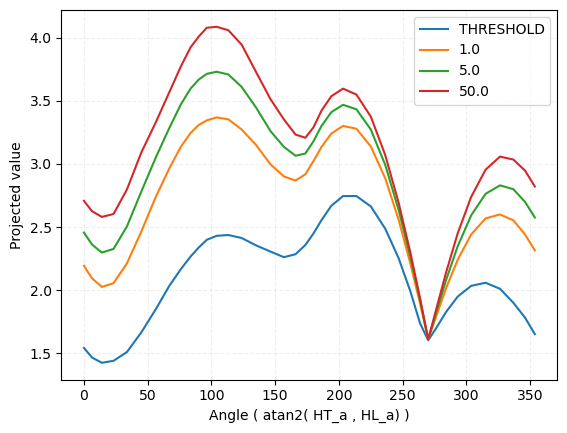

In [14]:
diform_4d.plot_angle_parameters( plane = ["HL_a"  , "HT_a" ], values = ["THRESHOLD" , 1.0 , 5.0 , 50.] );

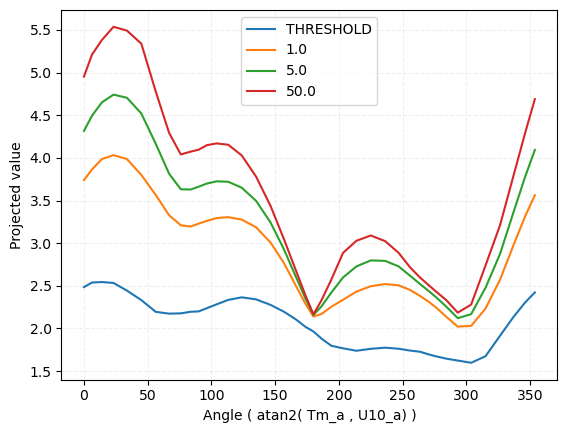

In [15]:
diform_4d.plot_angle_parameters( plane = ["U10_a"  , "Tm_a" ], values = ["THRESHOLD" , 1.0 , 5.0 , 50.] );

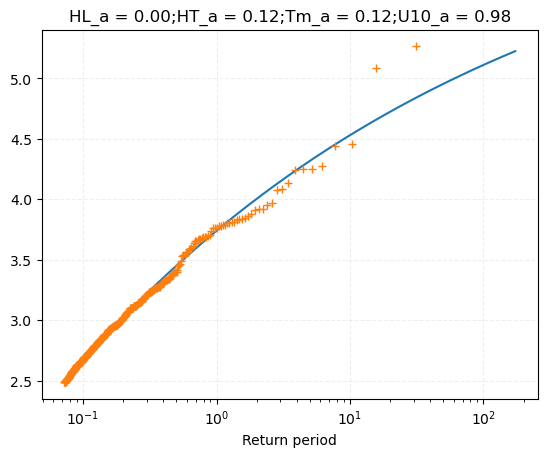

In [16]:
diform_4d.plot_univariate( i_direction = 0 );